In [1]:
import numpy as np
import matplotlib as plt
import lightkurve as lk
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
%matplotlib inline

In [7]:
search_result = lk.search_lightcurve('KIC 8462852', author='TESS-SPOC', cadence='long')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,TESS-SPOC,1800,185336364,0.0
1,TESS Sector 15,2019,TESS-SPOC,1800,185336364,0.0
2,TESS Sector 41,2021,TESS-SPOC,600,185336364,0.0
3,TESS Sector 54,2022,TESS-SPOC,600,185336364,0.0
4,TESS Sector 55,2022,TESS-SPOC,600,185336364,0.0


In [8]:
lc_collection = search_result.download_all()
lc_collection

LightCurveCollection of 5 objects:
    0: <TessLightCurve LABEL="TIC 185336364" SECTOR=14 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 185336364" SECTOR=15 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 185336364" SECTOR=41 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    3: <TessLightCurve LABEL="TIC 185336364" SECTOR=54 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    4: <TessLightCurve LABEL="TIC 185336364" SECTOR=55 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

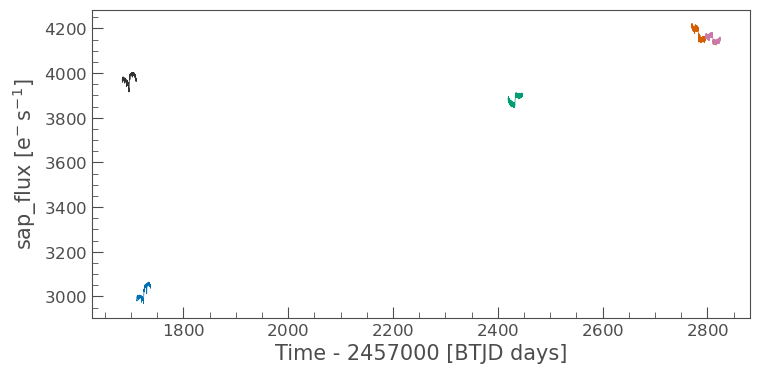

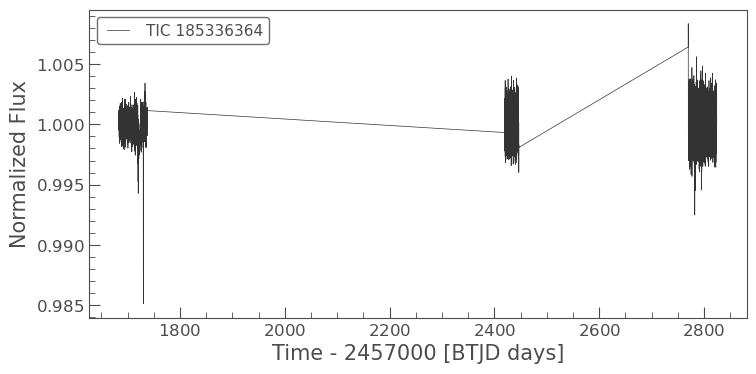

In [9]:
ax = lc_collection[0].plot(column='sap_flux', label=None)
for lc in lc_collection[1:]:
    lc.plot(ax=ax, column='sap_flux', label=None)

lc_stitched = lc_collection.stitch()
lc_stitched
lc_stitched.plot()

12.512651265126513 d
1687.7832784616708
0.33 d
0.07991911376824336 1 / d


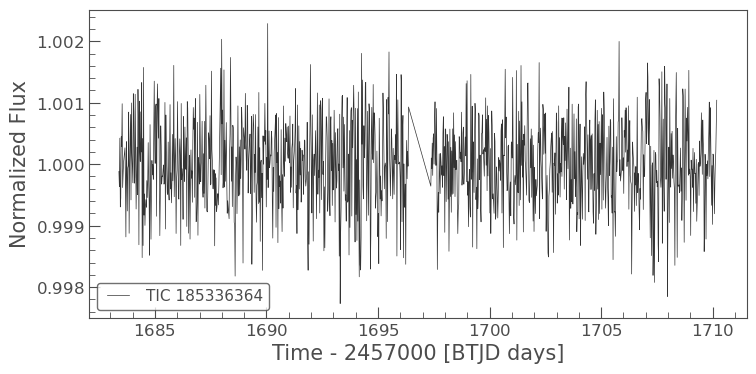

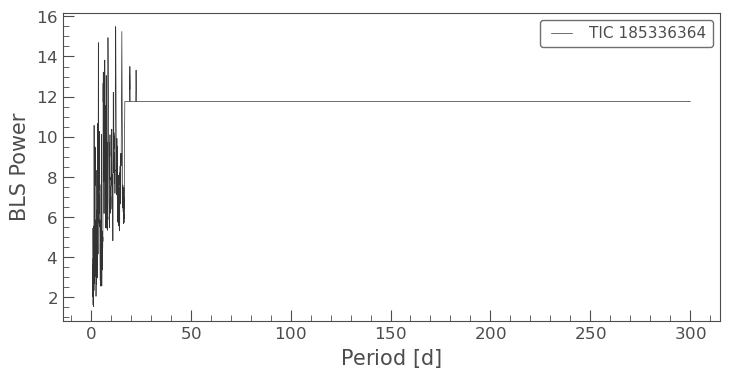

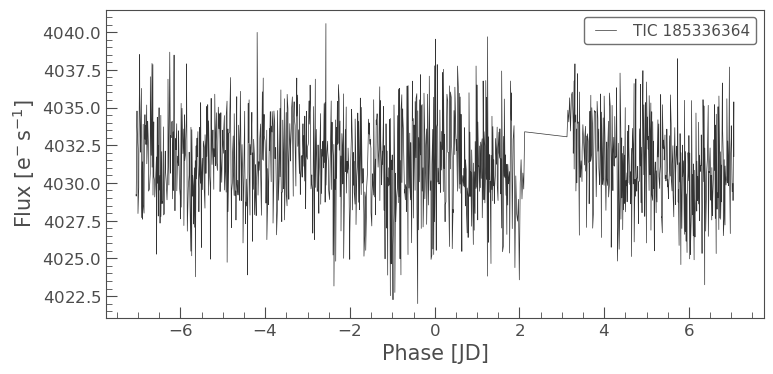

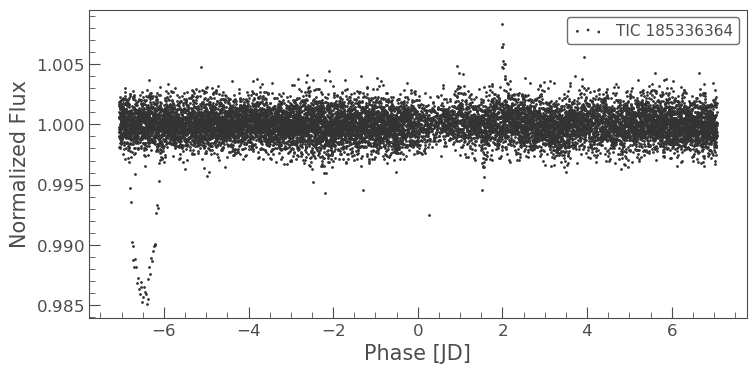

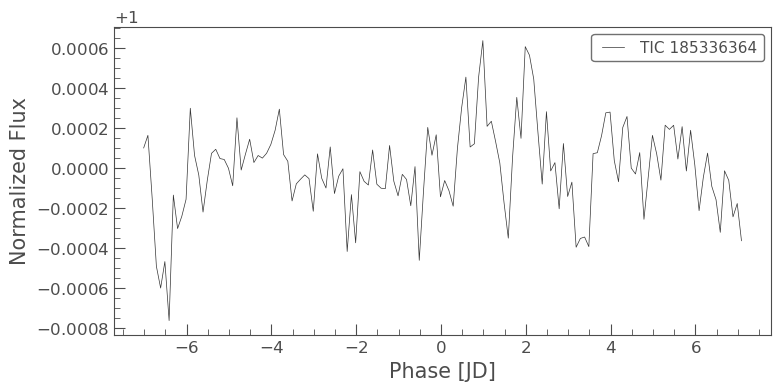

In [5]:
lc_q0 = lc_collection[0]

lc_q0_flat = lc_q0.flatten().plot()

period = np.linspace(1, 300, 10000)
bls = lc_q0.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

planet_x_period = bls.period_at_max_power
planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power
planet_x_freq = bls.frequency_at_max_power

print(planet_x_period)
print(planet_x_t0)
print(planet_x_dur)
print(planet_x_freq)

p, t0 = 14.127412741274128 , 1694.245545573212

folded_lc_q0 = lc_q0.fold(period=p, epoch_time=t0)

folded_lc_q0.plot()

lc_stitched_folded = lc_stitched.fold(period=p, epoch_time=t0).scatter()
lc_stitched_folded_binned = lc_stitched.fold(period=p, epoch_time=t0).bin(time_bin_size=0.1).plot()

(-30.0, 20.0)

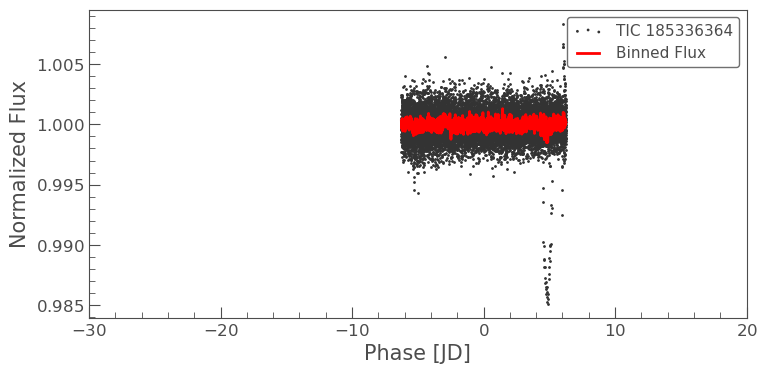

In [6]:
ax = lc_stitched.fold(planet_x_period, planet_x_t0).scatter()
lc_stitched.fold(planet_x_period, planet_x_t0).bin(.01).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-30, 20)